# Point set registration problem

We are given two patterns $\{x_i\}$, $\{y_i\}$ ($i = 1, 2, \ldots, N$) in m-dimesional space. In our case we are going to take a $2$-dimesional space and two point sets with $57$ elements each. The idea is to find the similarity transformation parameters R - the rotation matrix-, t - the traslation vector- and c - an scalar that give us the scaling- giving the minimun value of the mean squeared error $e^2(R,t,c)$ of these two point patterns.

In [100]:
using LinearAlgebra
using Random

The first step is to define de figure. I have choosen the Lemniscate that is given by $x = \frac{a\cdot cos(\theta)}{1+sin(\theta)^2}$ and $y = \frac{a\cdot cos(\theta) sin(\theta)}{1+sin(\theta)^2}$, $0 \leq \theta \leq 2\pi$.


In [101]:
#Figure definition
N = 57;
tp = LinRange(0, 2π, N);
a = 1.5;

fx(t) = 1.5*cos(t)/(1+sin(t)^2);
fy(t) = (1.5*cos(t)*sin(t))/(1+sin(t)^2);

Now, lets define the point sets $Y=\{y_i\}$, and $X=\{x_i\}$. The first point pattern is given by the evaluation of the Lemniscate's parameter equation, that was evaluated in $57$ points in a range of $0$ to $2\pi$.
The second, was defined by the evaluation of the Lemniscate's parameter equation in the same points and limits, but it was altered in the sense of rotation, scaling and traslation.

In [102]:
y_1 = fx.(tp);
y_2 = fy.(tp); 
Y = [y_1 y_2]

ti = LinRange(1, 1, N)
x_1 = fx.(tp)*0.1 + ti;
x_2 = fy.(tp)*0.1 + ti;
X = [x_1 x_2];

θ = π/6;
M = Array([cos(θ) -sin(θ); sin(θ) cos(θ)]);
for i = 1:N
    X[i, :] = M*X[i, :]
end


Plot the point patters $X$ and $Y$.

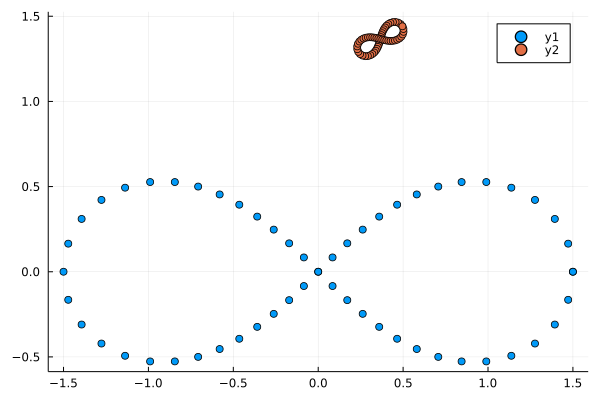

In [104]:
using Plots
scatter(Y[:, 1], Y[:, 2])
scatter!(X[:, 1], X[:, 2])

We define the mean vectors $\mu_x$, $\mu_y$ of $X$, $Y$ respectively, by

\begin{equation*}
\mu_x = \frac{1}{N} \sum_{i = 1}^{N} \textbf{x}_i
\end{equation*}

\begin{equation*}
\mu_y = \frac{1}{N} \sum_{i = 1}^{N} \textbf{y}_i
\end{equation*}



In [105]:
function mu(points)
    μ = fill(0,2);
    for i = 1:N
        μ += points[i, :];
    end
    μ = (1/N)*μ;
end

μ_x = mu(X);
μ_y = mu(Y);

The variance of the mean vectors $\sigma_x^2$ and $\sigma_y^2$ of $X$ and $Y$ respectively, is defined as

\begin{equation*}
\sigma_x^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{x}_i - \textbf{$\mu$}_x||^2
\end{equation*}

\begin{equation*}
\sigma_y^2 = \frac{1}{N} \sum_{i=1}^{N} ||\textbf{y}_i - \textbf{$\mu$}_y||^2
\end{equation*}

In [106]:
function sigmap(points, miu)
    σ = 0;
    for i = 1:N
        σ += (norm(points[i, :] - miu))^2;
    end
    σ = (1/N)*σ;
end

σ_x = sigmap(X, μ_x);
σ_y = sigmap(Y, μ_y)

0.9544111434175341

Now, let a covariance matrix of $X$ and $Y$ $\Sigma_{xy}$  is given by

\begin{equation*}
\Sigma_{xy} = \frac{1}{N} \sum_{i=0}^{N} (\textbf{y}_i -\mu_y)(\textbf{x}_i - \mu_x)^{T}
\end{equation*} 

In [107]:
Σ_x_y = fill(0,2,2);
for i = 1:N
    Σ_x_y += (Y[i, :] - μ_y)*transpose(X[i, :] - μ_x);
end
Σ_x_y = (1/N)*Σ_x_y 

2×2 Matrix{Float64}:
  0.0710418   0.041016
 -0.00670455  0.0116126

Let a singular value descomposition (SVD) of $\Sigma_{xy}$ be $UDV^T$ with $D=diag(d_i)$ ($d_i \geq 0$,  $i = 1, \ldots, m$).

In [108]:
#Singular Value Descomposition
U, D, V = svd(Σ_x_y)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -1.0          0.0
 -4.16334e-17  1.0
singular values:
2-element Vector{Float64}:
 0.0820320237377929
 0.01340909060396049
Vt factor:
2×2 Matrix{Float64}:
 -0.866025  -0.5
 -0.5        0.866025

Let's define the matrix $S$ like this:


1. If $rank(\Sigma_{xy}) \geq m-1$, then

$$S = \left\{ \begin{array}{lcc}
I & if & det(\Sigma_{xy}) \geq 0  \\
diag(1,1, \ldots, -1) & if & det(\Sigma_{xy}) < 0
              \end{array}
\right.$$

2. If rank($\Sigma_{xy}) = m-1$, then

$$S = \left\{ \begin{array}{lcc}
I & if & det(U)det(V) = 1 \\
diag(1,1, \ldots, -1) & if & det(U)det(V) = -1
              \end{array}
\right.$$



In [109]:
m = size(D, 1);

if rank(Σ_x_y) >= m-1
    if det(Σ_x_y) >= 0
        S = 1*I(m);
    else 
        S = 1*I(m)
        S[m,m] = -1;
    end
elseif rank(Σ_x_y) == m-1
       if det(U)*det(V) == 1
            S = 1*I(m);
       elseif det(U)*det(V) == -1
            S = 1*I(m);
            S[m,m] = -1;
       end
end

2×2 Diagonal{Int64, Vector{Int64}}:
 1  ⋅
 ⋅  1

Now let's see how the rotation matrix $R$, the traslation vector $t$, and the scaling scalar $c$ are defined
\begin{equation*}
\begin{split}
R &= USV^T \\
t &= \mu_y - cR\mu_x \\
c &= \frac{1}{\sigma_x^2}tr(DS)
\end{split}
\end{equation*}

In [110]:
R = U*S*transpose(V);
c = (1/σ_x)*tr(diagm(D)*S);
t_r = μ_y - c*R*μ_x;
display(R)
display(c)
display(t_r)

2×2 Matrix{Float64}:
  0.866025  0.5
 -0.5       0.866025

10.0

2-element Vector{Float64}:
 -9.999999999999995
 -9.999999999999998

It's time to calculate the errors, remember that the idea was to get the parameters that minimize the value of the mean squeared error $e^2(R,t,c)$ that is given by 

\begin{equation*}
e^2(R,t,c) = \frac{1}{N} \sum_{i=0}^{N} ||\textbf{y}_i - (cR\textbf{x}_i +t)||^2
\end{equation*}

But, in accordance with the definition of the matrix $S$, we can cosider two errors that in the end will be the same. Let $\epsilon^2$ be defined as follows 

\begin{equation*}
\epsilon^2 = \sigma_y^2 - \frac{tr(DS)^2}{\sigma_x^2}
\end{equation*}

In [111]:
# Calculation of errors
e_2 = 0;
for i = 1:N
    e_2 += (norm(Y[i, :]-(c*R*X[i, :] + t_r)) )^2
end
e_2 = (1/N)* e_2;

ϵ_2 = σ_y - tr(diagm(D)*S)^2/σ_x;

display(e_2)
display(ϵ_2)

4.340547163274155e-29

1.1102230246251565e-16

Now, we are going to calculate the model that will allow us snap the point set $X$ with the point set $Y$ using the rotaltion matrix, the traslation vector and the scaling scalar.

In [112]:
X̂ = fill(0., N, m);

for i = 1:N
    X̂[i,:] = c*R*X[i, :]+t_r
end

display(X̂)

57×2 Matrix{Float64}:
 1.5        5.32907e-15
 1.47211    0.164824
 1.3934     0.31006
 1.27657    0.421625
 1.13734    0.493475
 0.98989    0.526653
 0.844469   0.526518
 0.707107   0.5
 0.580437   0.453804
 0.464808   0.393564
 0.359226   0.323651
 0.261999   0.247297
 0.171127   0.166837
 ⋮         
 0.261999  -0.247297
 0.359226  -0.323651
 0.464808  -0.393564
 0.580437  -0.453804
 0.707107  -0.5
 0.844469  -0.526518
 0.98989   -0.526653
 1.13734   -0.493475
 1.27657   -0.421625
 1.3934    -0.31006
 1.47211   -0.164824
 1.5        5.32907e-15

Finally, the animation is presented. It's important to see that the transformation goes from the set of points $X$ to the set of points $Y$, for this reason the animation from the $X$'s to the $\hat{X}$'s is proposed.

We know that every rotation matrix is of the form

\begin{equation*}
   \begin{pmatrix}
     cos(\theta) & -sin(\theta) \\
     sin(\theta) & cos(\theta)
    \end{pmatrix}
\end{equation*}
   
so we consider the function $arccos(x)$ to see to what angle the transformation using in the rotation matrix $R$ and that the figures fit, however, this function is restricted so we have to define it in special form. In this way, we can see that the parameters transform $X$ in such a way that it fits perfectly with $Y$.

┌ Info: Saved animation to 
│   fn = C:\Users\maria\Desktop\Universidad\2022-I\Matemáticas para ML\Scripts\tmp.gif
└ @ Plots C:\Users\maria\.julia\packages\Plots\8K4be\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\maria\\Desktop\\Universidad\\2022-I\\Matemáticas para ML\\Scripts\\tmp.gif")
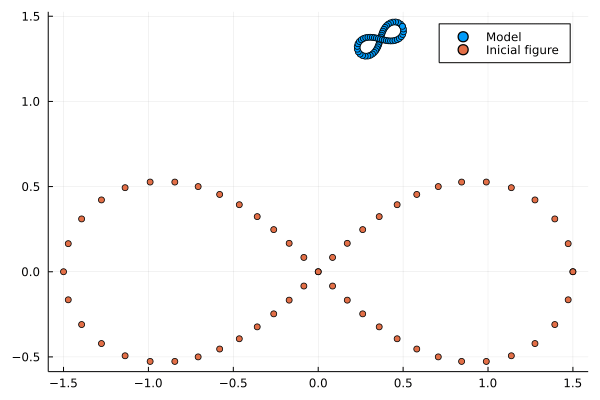

In [113]:
β = acos(R[1,1]);
Rot = Array([cos(β) -sin(β); sin(β) cos(β)]);
        
if (1. + ((c-1.)/β))*X*transpose(Rot) + ones(N,m)*diagm(t_r) == X̂
    β = β
else
    β = -β
end

@gif for i in range(0, β, 100)
         Rot = Array([cos(i) -sin(i); sin(i) cos(i)])
         Z = (1. + ((c-1.)/β)*i)*X*transpose(Rot) + (i/β)*ones(N,m)*diagm(t_r)
         scatter(Z[:,1], Z[:, 2], label = "Model")
         scatter!(Y[:, 1], Y[:, 2], label = "Inicial figure")
end 